In [1]:
from utils import load_cnf, cnf_to_bqm
from redundancy import initialize_mirror_vars, mirror_variable, update_bqm_mirror_variables,update_bqm_single_mirror
from redundancy import get_bqm_chain_lengths
from embedding_utils import count_qubits_used
from minorminer import find_embedding
from dwave.system import DWaveSampler, FixedEmbeddingComposite
from greedy import SteepestDescentComposite
from embedding_utils import get_chain_lengths
import seaborn as sns

def load_file(folder = 'sat', _variables=140):
    path = f"./{folder}/sgen1-{folder}-{_variables}-100.cnf"
    num_variables, num_clauses, variables, clauses = load_cnf(path)
    return num_variables, num_clauses, variables, clauses

In [14]:
original_vars_to_mirrors = dict()
mirrors = dict()
num_variables, num_clauses, variables, clauses = load_file()
initialize_mirror_vars(variables, mirrors, original_vars_to_mirrors)

In [15]:
for var in range(71,141):
    mirror_variable(var, variables, clauses, mirrors, original_vars_to_mirrors)

In [16]:
bqm, or_result_vars, clauses_qubits = cnf_to_bqm(variables, clauses)
len(bqm.variables)

378

In [17]:
# update_bqm_mirror_variables(bqm, mirrors, original_vars_to_mirrors)
for i in range(71, 141):
    update_bqm_single_mirror(bqm, i, mirrors, original_vars_to_mirrors)

In [18]:
len(bqm.variables)

378

----------------------------

<AxesSubplot:ylabel='Count'>

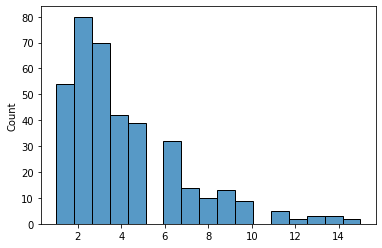

In [28]:
qpu_pegasus = DWaveSampler(solver={'topology__type': 'pegasus'})
embedding = find_embedding(bqm.quadratic.keys(), qpu_pegasus.edgelist, random_seed=1432)

sns.histplot(get_chain_lengths(bqm, embedding)[0])

In [8]:
count_qubits_used(embedding)

1656

In [9]:
# from dwave.system import DWaveSampler, EmbeddingComposite
# sampler = SteepestDescentComposite(EmbeddingComposite(DWaveSampler(solver={"name": "Advantage_system4.1"})))
# sampleset = sampler.sample(bqm, num_reads=5000, answer_mode='raw', chain_strength=1.5)
# sampleset.first.energy

import neal

simulated_sampler = neal.SimulatedAnnealingSampler()
sampleset = simulated_sampler.sample(bqm)
sampleset.first.energy

22.0

---------

In [16]:
len(sampleset.lowest())

1

In [17]:
def can_variable_be_fixed(sample, value, mirrors):
    for mirror in mirrors:
        if mirror not in sample.keys():
            return False
        if sample[mirror] != value:
            return False
    return True
def is_var_in_sample(sample, var):
    for key in sample.keys():
        if var == key:
            return True
    return False
def get_sample_fixed_values(sample):
    fixed_vars = dict()
    for (var, mirrors) in original_vars_to_mirrors.items():
        if is_var_in_sample(sample, var):
            value = sample[var]
            if can_variable_be_fixed(sample, value, mirrors):
                fixed_vars[var] = value
    return fixed_vars
def fix_variables(variables_to_fix):
    for (var, mirrors) in original_vars_to_mirrors.items():
        if var in variables_to_fix.keys():
            bqm.fix_variable(var, variables_to_fix[var])
            for mirror in mirrors:
                bqm.fix_variable(mirror, variables_to_fix[var])

In [21]:
result_samples = []
for sample in sampleset.lowest():
    result_samples.append(dict())
    for i in range(1,71):
        result_samples[len(result_samples)-1][i] = sample[i]

In [34]:
len(result_samples[0])

70

In [23]:
fix_variables(result_samples[0])

In [42]:
from typing import Dict, List, Tuple, Set
from redundancy import get_original_variable
def evaluate_clause(result: Dict[int, int], clause: List[int]) -> bool:
    clause_value = False
    for x in clause:
        original = get_original_variable(abs(x), mirrors)
        val = bool(result[original])
        if x < 0:
            val = not val
        clause_value = clause_value or val
    return clause_value

def evaluate_clauses(result, clauses):
    answer = True
    for clause in clauses:
        answer = answer and evaluate_clause(result, clause)
    return answer

def get_false_clauses(result, clauses):
    answer = []
    for clause in clauses:
        if not evaluate_clause(result, clause):
            answer.append(clause)
    return answer

In [45]:
ans = result_samples[0]
for i in range(71, 141):
    ans[i] = sampleset.first[0][i]

In [46]:
get_false_clauses(ans, clauses)

[[-223, -224],
 [-243, -244],
 [-108, -250],
 [-251, -253],
 [-256, -258],
 [-139, -140],
 [36, 106, 65, 85, 74],
 [14, 112, 88, 59, 5],
 [136, 21, 40, 9, 63]]

In [47]:
original_vars_to_mirrors

{1: [141],
 2: [142],
 3: [143],
 4: [144],
 5: [145],
 6: [146],
 7: [147],
 8: [148],
 9: [149],
 10: [150],
 11: [151],
 12: [152],
 13: [153],
 14: [154],
 15: [155],
 16: [156],
 17: [157],
 18: [158],
 19: [159],
 20: [160],
 21: [161],
 22: [162],
 23: [163],
 24: [164],
 25: [165],
 26: [166],
 27: [167],
 28: [168],
 29: [169],
 30: [170],
 31: [171],
 32: [172],
 33: [173],
 34: [174],
 35: [175],
 36: [176],
 37: [177],
 38: [178],
 39: [179],
 40: [180],
 41: [181],
 42: [182],
 43: [183],
 44: [184],
 45: [185],
 46: [186],
 47: [187],
 48: [188],
 49: [189],
 50: [190],
 51: [191],
 52: [192],
 53: [193],
 54: [194],
 55: [195],
 56: [196],
 57: [197],
 58: [198],
 59: [199],
 60: [200],
 61: [201],
 62: [202],
 63: [203],
 64: [204],
 65: [205],
 66: [206],
 67: [207],
 68: [208],
 69: [209],
 70: [210],
 71: [211],
 72: [212],
 73: [213],
 74: [214],
 75: [215],
 76: [216],
 77: [217],
 78: [218],
 79: [219],
 80: [220],
 81: [221],
 82: [222],
 83: [223],
 84: [224],
 

In [22]:
answer_path = "./sat/sgen1-sat-140-100_result.cnf"
answer_file = open(answer_path)
answer = dict()

cnf_result = answer_file.readline().split(" ")
assert (int(cnf_result[-1]) == 0)

for x in cnf_result[:-1]:
    int_x = int(x)
    value = int(int_x > 0)
    answer[abs(int_x)] = value
    for mirror in original_vars_to_mirrors[abs(int_x)]:
        answer[mirror] = value
answer_file.close()


In [27]:
from utils import evaluate_cnf_formula
evaluate_cnf_formula(answer, or_result_vars, bqm)

{1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 1, 28: 0, 29: 0, 30: 0, 31: 0, 32: 1, 33: 0, 34: 0, 35: 0, 36: 1, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 1, 69: 0, 70: 0, 71: 0, 141: 1, 72: 0, 142: 0, 73: 0, 143: 0, 74: 0, 144: 0, 75: 0, 145: 0, 76: 0, 146: 0, 77: 0, 147: 0, 78: 1, 148: 1, 79: 0, 149: 0, 80: 0, 150: 0, 81: 0, 151: 0, 82: 0, 152: 0, 83: 0, 153: 0, 84: 1, 154: 1, 85: 0, 155: 0, 86: 0, 156: 0, 87: 1, 157: 1, 88: 0, 158: 0, 89: 0, 159: 0, 90: 0, 160: 0, 91: 0, 161: 0, 92: 0, 162: 0, 93: 0, 163: 0, 94: 1, 164: 1, 95: 0, 165: 0, 96: 0, 166: 0, 97: 0, 167: 0, 98: 0, 168: 0, 99: 1, 169: 1, 100: 0, 170: 0, 101: 0, 171: 0, 102: 0, 172: 0, 103: 0, 173: 0, 104: 1, 174: 1, 105

6.0